In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement, product
from mpl_toolkits.mplot3d import Axes3D

# design matrix 
def designMatrix(M, d, arr):
    gen_monomials = []
    for degree in range(M + 1):
        for expo in combinations_with_replacement(range(d), degree):
            # print(exponents)
            power = [expo.count(i) for i in range(d)]
            # print(power)
            gen_monomials.append(power)

    design_matrix = []
    for arr_ele in arr:
        x = []
        for ele in gen_monomials:
            power = 1;
            for j in range(len(arr_ele)):
                power *= (arr_ele[j]**ele[j])
            x.append(power)
        design_matrix.append(x)
            
    return design_matrix

# parameters with regresion
def parameters_with_reg(design_matrix, output, lamb):
    D = len(design_matrix[0]);
    lambda_iden = lamb*np.identity(D)
    
    if not isinstance(design_matrix, np.ndarray):
        design_matrix = np.array(design_matrix)

    parameters = ((np.linalg.inv((design_matrix.T @ design_matrix)+lambda_iden) @ design_matrix.T) @ output)
    return parameters

# parameter without regression
def parameters_without_reg(design_matrix, output_vector):
    pseudo_inverse = np.linalg.pinv(design_matrix)
    parameter_vector = pseudo_inverse @ output_vector
    return parameter_vector

# Predict y values
def predict(x, M, d, param):
    dm = designMatrix(M, d, x)
    return dm @ param

# erms calculation
def cal_erms(y_pred, y_act):
    return np.sqrt(np.mean((y_pred - y_act) ** 2))

# plotting
def plotxy(X, y, y_pred, y_predreg):
    plt.figure(figsize=(10, 6))
    plt.plot(X, y_pred, color = 'blue', label = 'Curvefit_without regularizer')
    plt.plot(X, y_predreg, color = "green", label = 'Curvefit_with regularizer')
    plt.scatter(X, y, color = 'orange', label = 'Training_Data')
    plt.xlabel('X_data')
    plt.ylabel('Model_output_Yn')
    plt.title('Actual vs. Predicted Values')
    plt.legend()
    plt.show()

def plotxy1(x,y,param,param_reg,M,d):
    x_fit=np.linspace(min(x)-1,max(x)+1,500)
    y_fit=predict(x_fit,M,d,param)
    y_fit_reg=predict(x_fit,M,d,param_reg)
    plt.scatter(x,y,color='orange',label='training_data')
    plt.plot(x_fit,y_fit,color='blue',label='Curvefit_without regularizer')
    plt.plot(x_fit,y_fit_reg,color='green',label='Curvefit_with regularizer')
    plt.grid(True)
    plt.xlabel('X_data')
    plt.ylabel('Model_output_Yn')
    plt.title('Actual vs. Predicted Values')
    plt.legend()
    plt.show()

# plotting 45degree line
def plotyy(y_actual, y_predicted):
    plt.scatter(y_actual, y_predicted, color = 'blue', label = 'Output')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    min_value = min(y_actual.min(), y_predicted.min())
    max_value = max(y_actual.max(), y_predicted.max())
    #tempx=np.array([-100,100])
    #tempy=tempx;
    #plt.plpt(tempx,tempy,color='black')
    plt.plot([4, 10], [4, 10], linestyle = '--', color = 'red', label = '45-degree line')
    plt.xlim([4,10])
    plt.ylim([4,10])
    plt.grid(True)
    plt.legend()

In [427]:
# Reading file
import pandas as pd

df = pd.read_csv('C:/Users/arist/Desktop/Quantum/My Books/IITM/1st Sem/Machine Leearning/project1ML/team26-20240829T133439Z-001/team26/dataset3/train_data.csv')
print(df)
#df = df.sort_values()
x = df.to_numpy().reshape(-1,3)
df1 = pd.read_csv('C:/Users/arist/Desktop/Quantum/My Books/IITM/1st Sem/Machine Leearning/project1ML/team26-20240829T133439Z-001/team26/dataset3/train_label.csv')
y = df1.to_numpy().reshape(-1,1)
x,y

      1.200000000000000000e+01  -3.051999999999999957e+01  \
0                         92.0                     -12.28   
1                         21.0                       1.26   
2                        184.0                      -0.96   
3                         33.0                     -14.83   
4                        140.0                     -15.44   
...                        ...                        ...   
1518                       0.0                      40.86   
1519                      11.0                     -24.91   
1520                      33.0                     -32.67   
1521                      17.0                     -15.29   
1522                      39.0                      42.92   

      -1.780099999999999909e+02  
0                        -76.30  
1                        126.23  
2                        101.39  
3                       -178.75  
4                        167.48  
...                         ...  
1518                      15.

(array([[  92.  ,  -12.28,  -76.3 ],
        [  21.  ,    1.26,  126.23],
        [ 184.  ,   -0.96,  101.39],
        ...,
        [  33.  ,  -32.67, -178.21],
        [  17.  ,  -15.29, -173.07],
        [  39.  ,   42.92,  146.39]]),
 array([[6.1],
        [6.1],
        [6.2],
        ...,
        [5.8],
        [6. ],
        [5.8]]))

In [429]:
M=5
d=3
dm = designMatrix(M,d,x)
dm

[[1.0,
  92.0,
  -12.28,
  -76.29999999999998,
  8464.0,
  -1129.76,
  -7019.5999999999985,
  150.7984,
  936.9639999999997,
  5821.689999999998,
  778688.0,
  -103937.92,
  -645803.1999999998,
  13873.4528,
  86200.68799999998,
  535595.4799999997,
  -1851.8043519999997,
  -11505.917919999996,
  -71490.35319999997,
  -444194.9469999997,
  71639296.0,
  -9562288.639999999,
  -59413894.39999998,
  1276357.6575999998,
  7930463.295999998,
  49274784.15999998,
  -170366.00038399996,
  -1058544.4486399996,
  -6577112.494399997,
  -40865935.12399997,
  22740.157442559994,
  141292.67205759994,
  877901.5372959996,
  5454713.949159996,
  33892074.45609997,
  6590815232.0,
  -879730554.88,
  -5466078284.799999,
  117424904.49919999,
  729602623.2319998,
  4533280142.719998,
  -15673672.035327997,
  -97386089.27487996,
  -605094349.4847997,
  -3759666031.4079976,
  2092094.4847155195,
  12998925.829299193,
  80766941.43123196,
  501833683.32271963,
  3118070849.9611974,
  -279249.13339463674,


In [430]:
param = parameters_without_reg(dm, y)
param_reg= parameters_with_reg(dm,y,10)
param,param_reg

(array([[ 6.05035173e+00],
        [-8.92585499e-04],
        [-2.14481377e-03],
        [-4.47363668e-06],
        [ 8.70377472e-07],
        [ 6.65294556e-06],
        [-5.60535931e-06],
        [-8.73002211e-05],
        [-9.67491534e-07],
        [-8.19654884e-06],
        [ 1.07018186e-08],
        [ 1.17792887e-08],
        [ 4.44543902e-08],
        [ 1.47041730e-06],
        [-1.83686110e-07],
        [ 9.37672530e-08],
        [ 1.25118421e-06],
        [-1.53299018e-07],
        [ 3.96103078e-07],
        [ 2.74772561e-09],
        [-4.22199211e-11],
        [-3.98956789e-10],
        [-9.67559952e-11],
        [-5.41612599e-09],
        [ 1.32929840e-09],
        [-1.74410197e-10],
        [-2.18388871e-09],
        [ 3.14537365e-09],
        [ 6.12253403e-11],
        [-1.00762019e-10],
        [ 2.07837442e-08],
        [ 4.85515306e-12],
        [ 1.04381530e-09],
        [ 3.01859182e-10],
        [ 1.96210087e-10],
        [ 3.90644255e-14],
        [ 5.21541364e-13],
 

In [431]:
# Reading file
import pandas as pd

df = pd.read_csv('C:/Users/arist/Desktop/Quantum/My Books/IITM/1st Sem/Machine Leearning/project1ML/team26-20240829T133439Z-001/team26/dataset3/test_data.csv')
print(df)
#df = df.sort_values(by=['x1'])

x_test = df.to_numpy().reshape(-1,3)
df1 = pd.read_csv('C:/Users/arist/Desktop/Quantum/My Books/IITM/1st Sem/Machine Leearning/project1ML/team26-20240829T133439Z-001/team26/dataset3/test_label.csv')
y_act = df1.to_numpy().reshape(-1,1)

y_pred_train = predict(x,M,d,param)
y_pred_train_reg = predict(x,M,d,param_reg)
y_pred = predict(x_test,M,d,param)
y_pred_reg = predict(x_test,M,d,param_reg)

print(len(y_pred),len(y_act))
y_act,y_pred,y_pred_reg

     5.680000000000000000e+02  4.904999999999999716e+01  \
0                        33.0                     -5.36   
1                        11.0                     19.46   
2                         0.0                     43.72   
3                         8.0                     22.76   
4                        45.0                    -60.63   
..                        ...                       ...   
430                      53.0                     -1.81   
431                      70.0                     43.45   
432                      22.0                     14.17   
433                       0.0                     -5.18   
434                      51.0                     51.39   

     1.466299999999999955e+02  
0                      151.86  
1                     -155.14  
2                      147.80  
3                      121.47  
4                      -25.27  
..                        ...  
430                    120.46  
431                    147.98  
432

(array([[6. ],
        [5.9],
        [5.9],
        [6. ],
        [5.8],
        [6.1],
        [5.9],
        [6.1],
        [6. ],
        [6. ],
        [5.9],
        [6.1],
        [5.9],
        [6.5],
        [5.8],
        [5.8],
        [5.8],
        [6.6],
        [6.2],
        [6.1],
        [5.9],
        [5.9],
        [6.3],
        [6. ],
        [5.9],
        [6.5],
        [5.9],
        [6. ],
        [5.8],
        [6. ],
        [6.2],
        [5.9],
        [5.8],
        [6.1],
        [5.8],
        [5.8],
        [5.9],
        [6. ],
        [6.1],
        [5.8],
        [6. ],
        [6. ],
        [5.9],
        [6.3],
        [6.3],
        [6.5],
        [6. ],
        [5.9],
        [6.1],
        [6.5],
        [5.8],
        [5.8],
        [5.9],
        [6. ],
        [6.3],
        [5.9],
        [5.9],
        [6.2],
        [5.8],
        [6. ],
        [6.2],
        [6.2],
        [6. ],
        [5.9],
        [5.8],
        [5.8],
        [6

In [432]:
erms= cal_erms(y_pred,y_act)
erms_reg = cal_erms(y_pred_reg,y_act)
erms,erms_reg

(0.19309875369137053, 0.5256663169168609)

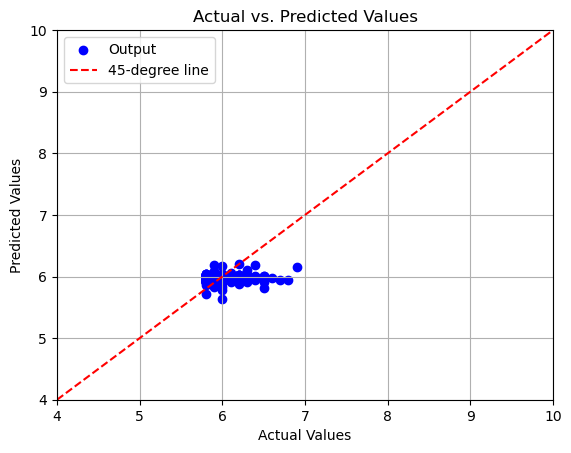

In [433]:
plotyy(y_act,y_pred)

For test data ( Without Regularization )

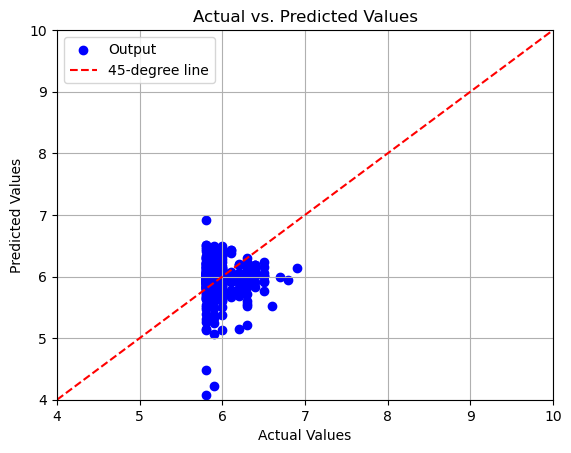

In [436]:
plotyy(y_act,y_pred_reg)

For test data ( With Regularization )

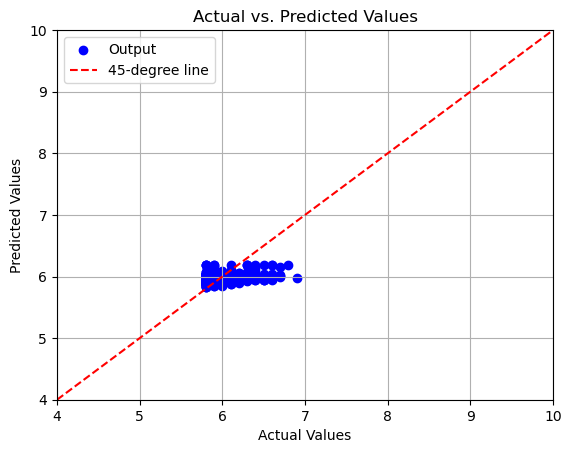

In [438]:
plotyy(y,y_pred_train)

For training data ( Without Regularization )


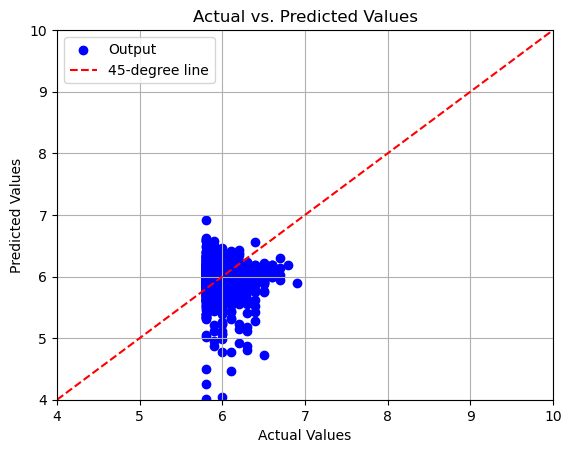

In [441]:
plotyy(y,y_pred_train_reg)

For training data ( With Regularization )